## Johns Hopkins Covid19

### Problem Statement

This is a daily updating version of COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU). The data updates every day at 6am UTC, which updates just after the raw JHU data typically updates.
The data covers: confirmed cases and deaths on a country level, confirmed cases and deaths by US county, some metadata that's available in the raw JHU data.

Aim to Prepare a complete data analysis report on the given data.Fix a period for prediction of confirmed cases/deaths. Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.Make suggestions to the government health department of the country/region for preparation based on your predictions.

#### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
covid_confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
covid_death=pd.read_csv('time_series_covid19_deaths_global.csv')
covid_recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

### Domain Analysis

We have given three covid csv file of global area.One is about covid confirmed case,next is covid death and last one about recovered case.
column described as follows:

    * Province/State:Name of states in the country
    * Country/Region:Name of country
    * Lat:Geographical Lattitude value of the area
    * Long:Geographical longitudinal value of the area
    * 1/22/20 to 9/21/20 :Each column representing value of covid cases of the day
        
    

### Basic Checks

In [3]:
print('covid_confirmed:',covid_confirmed.shape)
print('covid_death:',covid_death.shape)
print('covid_recovered:',covid_recovered.shape)

covid_confirmed: (266, 248)
covid_death: (266, 248)
covid_recovered: (253, 248)


In [4]:
print('covid_confirmed:',covid_confirmed.info())
print('----------------------------------------')
print('covid_death:',covid_death.info())
print('----------------------------------------')
print('covid_recovered:',covid_recovered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB
covid_confirmed: None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB
covid_death: None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB
covid_recovered: None


In [5]:
print('covid_confirmed:',covid_confirmed.describe())
print('----------------------------------------')
print('covid_death:',covid_death.describe())
print('----------------------------------------')
print('covid_recovered:',covid_recovered.describe())

covid_confirmed:               Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  266.000000  266.000000  266.000000  266.000000  266.000000  266.000000   
mean    21.076624   22.829441    2.086466    2.458647    3.537594    5.390977   
std     24.904600   70.191330   27.279200   27.377862   34.083035   47.434934   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.677575  -15.277675    0.000000    0.000000    0.000000    0.000000   
50%     22.820850   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     41.143200   77.913685    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       9/12/20  \
count   266.000000   266.000000   266.000000   266.000000  ...  2.660000e+02   
mean      7.962406    11.003759    20.969925    23.180451  ...  1.081163e+05   
std      66.2

In [6]:
covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175


In [7]:
covid_recovered.tail(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
243,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
244,NaN,Uruguay,-32.522800,-55.765800,0,0,0,0,0,0,...,1502,1513,1528,1545,1559,1582,1603,1612,1621,1634
245,NaN,Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,...,43359,43866,44375,44942,45422,45970,46527,47271,47932,48369
246,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,47729,48644,49371,50361,51274,52564,54218,55155,56096,56726
247,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,910,918,926,931,936,940,941,942,942,947
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629
252,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,5675,5678,5690,5783,5823,5841,5883,5914,5924,5924


### Data Preprocessing

In [8]:
print('covid_confirmed:',covid_confirmed.isnull().sum())
print('----------------------------------------')
print('covid_death:',covid_death.isnull().sum())
print('----------------------------------------')
print('covid_recovered:',covid_recovered.isnull().sum())

covid_confirmed: Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64
----------------------------------------
covid_death: Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64
----------------------------------------
covid_recovered: Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64


In [9]:
# there is null value only in Province/State,I dont think it is important.we can drop it

In [10]:
covid_confirmed['Country/Region'].nunique()

188

In [11]:
# drop Lat,long,not important for covid case

In [12]:
covid_confirmed.drop(['Province/State', 'Lat','Long'],axis=1,inplace=True)
covid_death.drop(['Province/State', 'Lat','Long'],axis=1,inplace=True)
covid_recovered.drop(['Province/State', 'Lat','Long'],axis=1,inplace=True)

In [13]:
print('covid_confirmed:',covid_confirmed.duplicated().sum())
print('----------------------------------------')
print('covid_death:',covid_death.duplicated().sum())
print('----------------------------------------')
print('covid_recovered:',covid_recovered.duplicated().sum())

covid_confirmed: 0
----------------------------------------
covid_death: 13
----------------------------------------
covid_recovered: 0


In [14]:
# droping duplicated value
covid_death.drop_duplicates(inplace=True)

In [15]:
print(covid_recovered['Country/Region'].value_counts())


China             33
France            11
United Kingdom    11
Australia          8
Netherlands        5
                  ..
Ghana              1
Greece             1
Grenada            1
Guatemala          1
Zimbabwe           1
Name: Country/Region, Length: 188, dtype: int64


In [16]:
covid_confirmed['Country/Region'].value_counts()


China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Greece             1
Grenada            1
Guatemala          1
Guinea             1
Zimbabwe           1
Name: Country/Region, Length: 188, dtype: int64

* canada have less record of recovered..13 rows are less

In [17]:
# transforming data appropriate format using melt function()(from wide to long)

In [18]:
df_recovered=covid_recovered.melt(id_vars=["Country/Region"], var_name="Date", value_name="recovered")
df_death=covid_death.melt(id_vars=["Country/Region"], var_name="Date", value_name="death")
df_confirm=covid_confirmed.melt(id_vars=["Country/Region"], var_name="Date", value_name="confirmed")
df_confirm.head(10)

,Country/Region,Date,confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
5,Antigua and Barbuda,1/22/20,0
6,Argentina,1/22/20,0
7,Armenia,1/22/20,0
8,Australia,1/22/20,0
9,Australia,1/22/20,0


In [19]:
#converting datatype of date into datetime format

In [20]:
df_confirm['Date'] = pd.to_datetime(df_confirm['Date'])
df_recovered['Date'] = pd.to_datetime(df_recovered['Date'])
df_death['Date'] = pd.to_datetime(df_death['Date'])

In [21]:
df_confirm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64904 entries, 0 to 64903
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  64904 non-null  object        
 1   Date            64904 non-null  datetime64[ns]
 2   confirmed       64904 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ MB


In [22]:
#selecting most popuplated countries from the dataset to analyse ,China>India>Us>Pakistan>France

In [23]:
country=['India','China','US','Pakistan','France']

In [24]:
df_conf_country=df_confirm.loc[df_confirm['Country/Region'].isin(country)]
print(df_conf_country)

      Country/Region       Date  confirmed
56             China 2020-01-22          1
57             China 2020-01-22         14
58             China 2020-01-22          6
59             China 2020-01-22          1
60             China 2020-01-22          0
...              ...        ...        ...
64763         France 2020-09-21        330
64764         France 2020-09-21     473974
64781          India 2020-09-21    5487580
64836       Pakistan 2020-09-21     306886
64880             US 2020-09-21    6856884

[11468 rows x 3 columns]


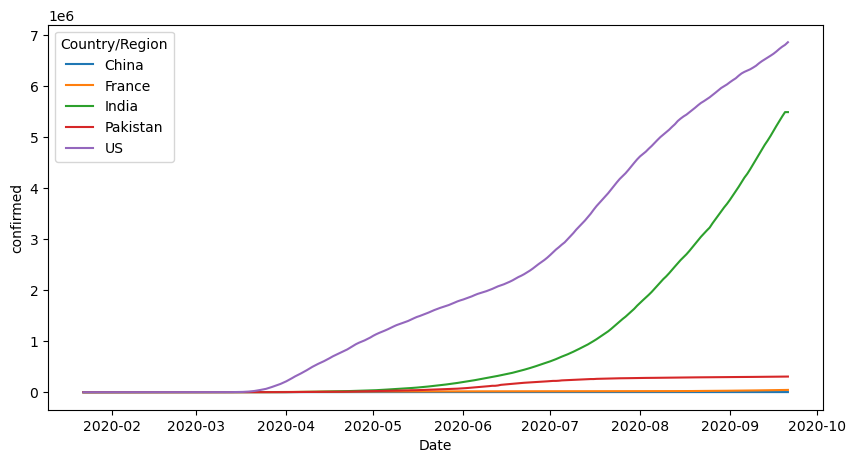

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='confirmed', data=df_conf_country, ci=None,hue='Country/Region') #Confidence interval
plt.show()

###### Insight
* Covid confirmed case reported as 0, from january to half of march
* US reported confirmed case in high rate,means fastly spreding to people
* China is the most populated country,but graph showing confirmed case reported very less
* from May half India's confirmed case increased fastly,showing second confirmed list 
* Pakistan and France are reportted very less confirmed cseses by comparing their population


In [26]:
df_rec_country=df_recovered.loc[df_recovered['Country/Region'].isin(country)]
print(df_rec_country)

      Country/Region       Date  recovered
43             China 2020-01-22          0
44             China 2020-01-22          0
45             China 2020-01-22          0
46             China 2020-01-22          0
47             China 2020-01-22          0
...              ...        ...        ...
61591         France 2020-09-21        206
61592         France 2020-09-21      77254
61609          India 2020-09-21    4396399
61664       Pakistan 2020-09-21     293159
61708             US 2020-09-21    2615949

[11468 rows x 3 columns]


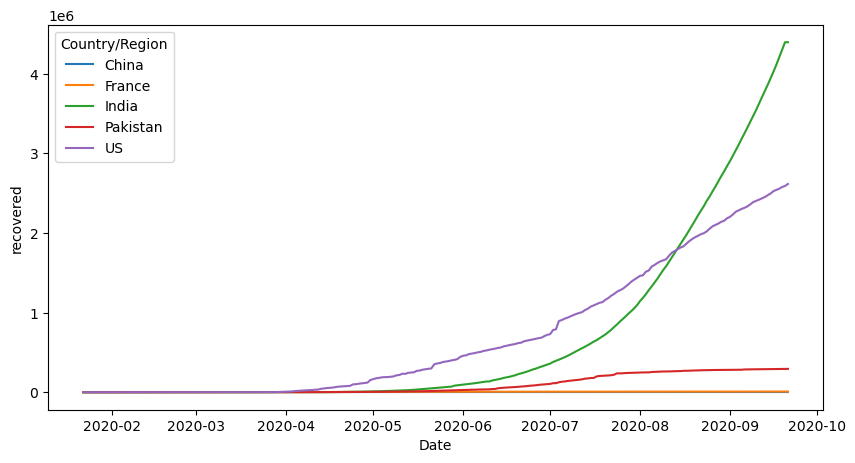

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='recovered', data=df_rec_country, ci=None,hue='Country/Region') #Confidence interval
plt.show()

##### Insight
* US is the most covid recovered country from may to august half,showing recovered case is also more when compared to its confirmed case
* After August India's recovered value is suddenly increased
* According to China,Pakistan and France almost same condition on number of recovered with respect to confirmed


In [28]:
df_death_country=df_death.loc[df_death['Country/Region'].isin(country)]
print(df_death_country)

      Country/Region       Date   death
54             China 2020-01-22       0
55             China 2020-01-22       0
56             China 2020-01-22       0
57             China 2020-01-22       0
58             China 2020-01-22       0
...              ...        ...     ...
61593         France 2020-09-21       6
61594         France 2020-09-21   31174
61611          India 2020-09-21   87882
61666       Pakistan 2020-09-21    6424
61710             US 2020-09-21  199865

[9516 rows x 3 columns]


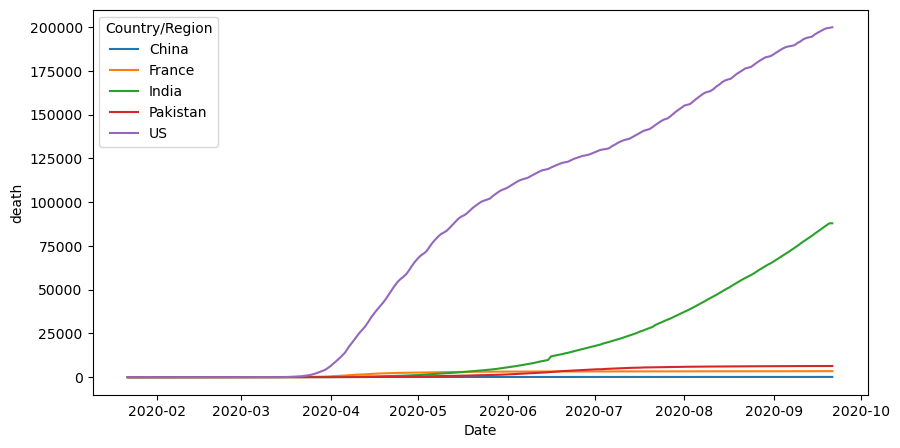

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='death', data=df_death_country, ci=None,hue='Country/Region') #Confidence interval
plt.show()

##### Insight
* Number of death is very less in china,France and Pakistan
* US showing more number of covid death from april onwards
* from may onwards India's death value get increases

### Predictive Analysis

In [30]:
#df_conf_country.tail()
df_US=df_confirm.loc[df_confirm['Country/Region']=='US']
df_US

,Country/Region,Date,confirmed
242,US,2020-01-22,1
508,US,2020-01-23,1
774,US,2020-01-24,2
1040,US,2020-01-25,2
1306,US,2020-01-26,5
...,...,...,...
63816,US,2020-09-17,6674411
64082,US,2020-09-18,6723933
64348,US,2020-09-19,6768119
64614,US,2020-09-20,6804814


In [31]:
df_con=df_US.drop('Country/Region',axis=1)

In [32]:
#df_conf=df_con.groupby('Date',).sum('confirmed')
#df_conf


In [33]:
#daily_data.index = pd.to_datetime(daily_data.index)

# Resample the data to monthly frequency
#monthly_data = daily_data.resample('M').mean


In [34]:
df_con.head()

,Date,confirmed
242,2020-01-22,1
508,2020-01-23,1
774,2020-01-24,2
1040,2020-01-25,2
1306,2020-01-26,5


In [35]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 242 to 64880
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   confirmed  244 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.7 KB


In [36]:
df_con.set_index('Date', inplace=True)

In [37]:
#df_month=df_con.resample('MS').mean()

In [38]:
df_con

,confirmed
Date,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2020-09-17,6674411
2020-09-18,6723933
2020-09-19,6768119


<Axes: xlabel='confirmed'>

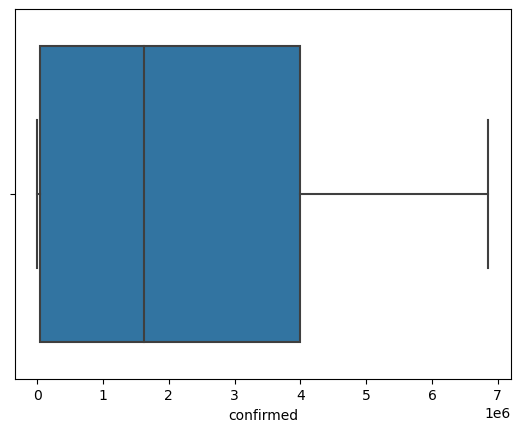

In [39]:
sns.boxplot(x='confirmed',data=df_con)

<Axes: xlabel='Date'>

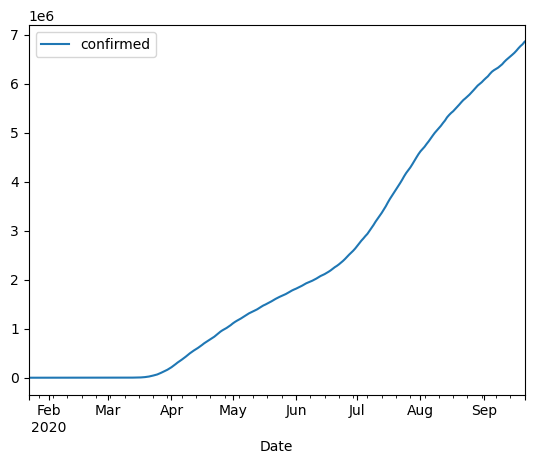

In [40]:

df_con.plot()#check for stionarity

In [41]:
df=np.log(df_con)

<Axes: xlabel='Date'>

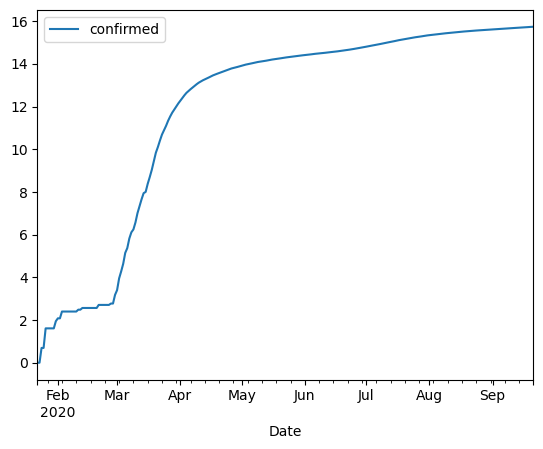

In [42]:
df.plot()

In [43]:
#Adfuller test
from statsmodels.tsa.stattools import adfuller
test=adfuller(df.confirmed) #,autolag="AIC")
print(test)
print("adf_score",test[0])
print("p value",test[1])
print("lags",test[2])
print("no_of_obsrvation",test[3])
print("critical region",test[4])

(-2.0897814950729763, 0.24864331616372354, 6, 237, {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}, -727.5358568707293)
adf_score -2.0897814950729763
p value 0.24864331616372354
lags 6
no_of_obsrvation 237
critical region {'1%': -3.4582467982399105, '5%': -2.8738137461081323, '10%': -2.5733111490323846}


In [44]:
##if p<0.05 we say data is stionary
#if p>0.05 we say data is non stionary
#clearly  p>0.05,hence time series non stionary

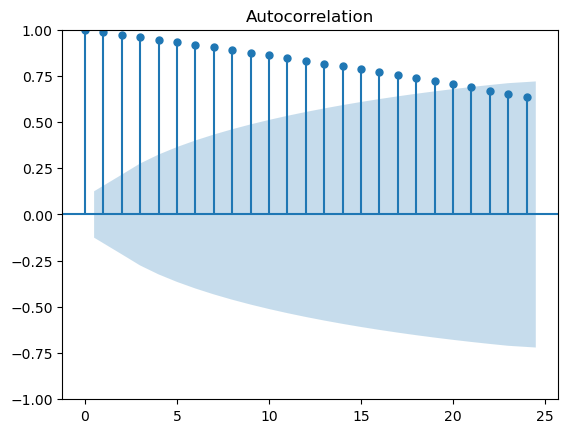

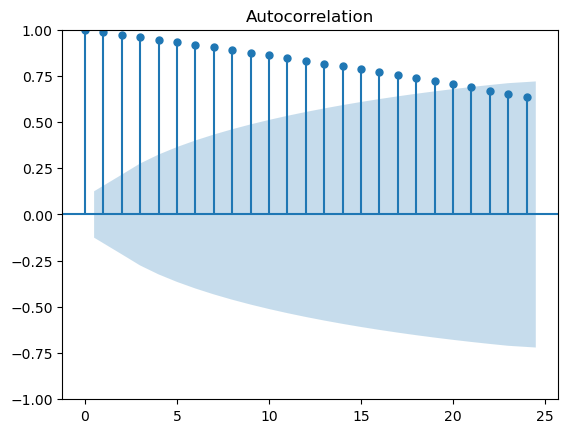

In [45]:
#ACF plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df)


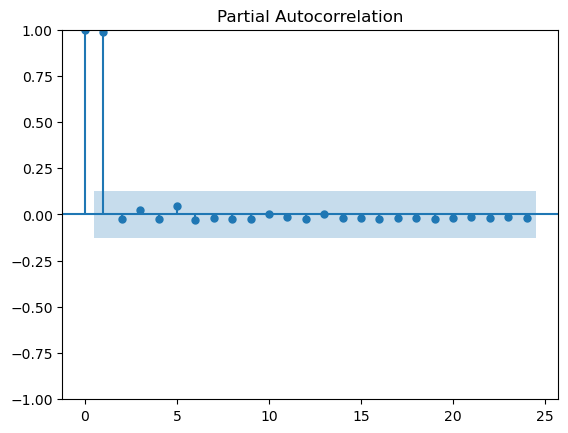

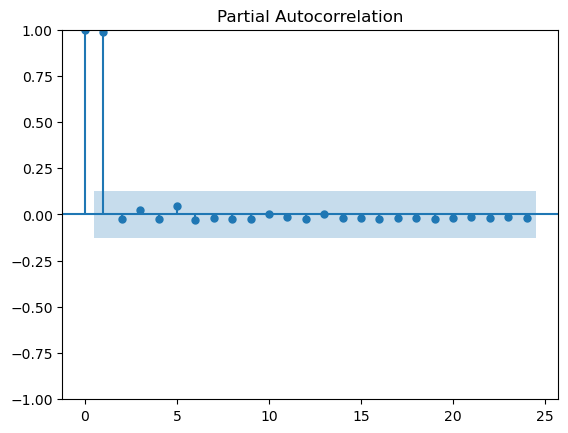

In [46]:
plot_pacf(df)

In [47]:
#  p<0.05 stationary,p>0.05 non stationary
# here p value grather than 0.05 since non stationary

In [48]:
df_conf1=df.diff(periods=5)
df_conf1

,confirmed
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,NaN
2020-01-25,NaN
2020-01-26,NaN
...,...
2020-09-17,0.028770
2020-09-18,0.030780
2020-09-19,0.032201


In [49]:
df_conf1=df_conf1.iloc[5:,:]
df_conf1

,confirmed
Date,
2020-01-27,1.609438
2020-01-28,1.609438
2020-01-29,0.916291
2020-01-30,0.916291
2020-01-31,0.336472
...,...
2020-09-17,0.028770
2020-09-18,0.030780
2020-09-19,0.032201


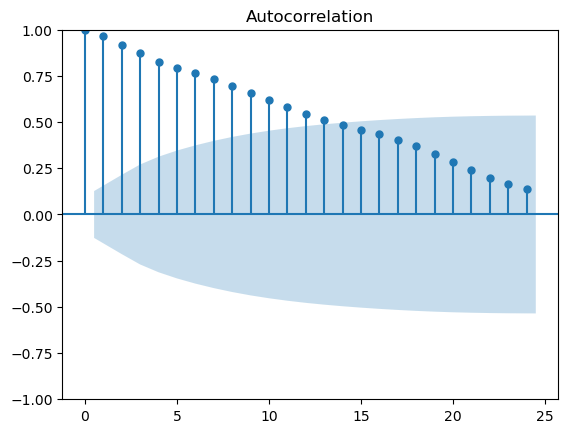

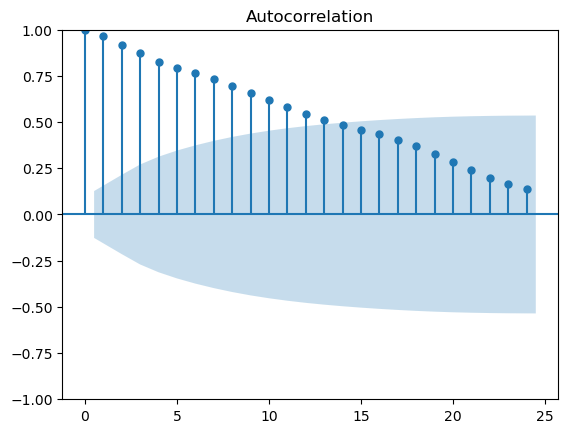

In [50]:
#ACF plot
plot_acf(df_conf1)

In [51]:
df_conf2=df_conf1.diff(periods=5)

In [52]:
df_conf2=df_conf2.iloc[5:,:]
df_conf2

,confirmed
Date,
2020-02-01,-1.139434
2020-02-02,-1.139434
2020-02-03,-0.127833
2020-02-04,-0.127833
2020-02-05,0.115513
...,...
2020-09-17,-0.000092
2020-09-18,0.000715
2020-09-19,0.002240


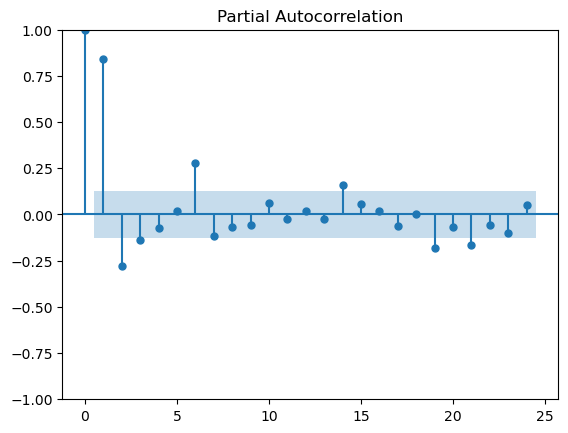

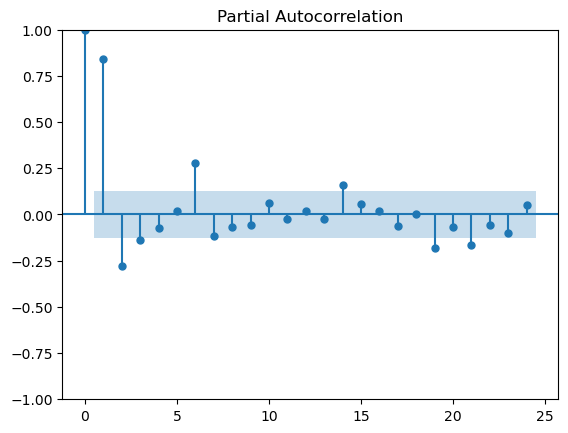

In [53]:
plot_pacf(df_conf2)

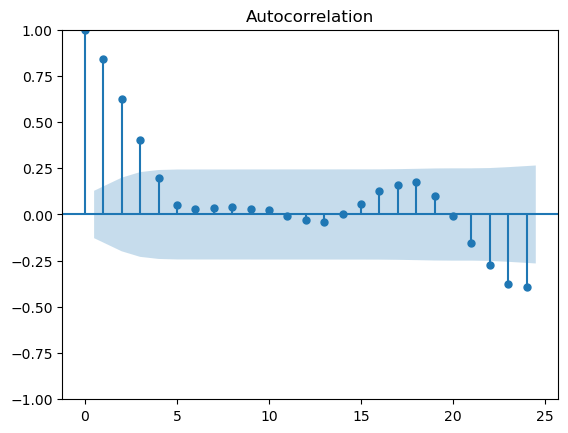

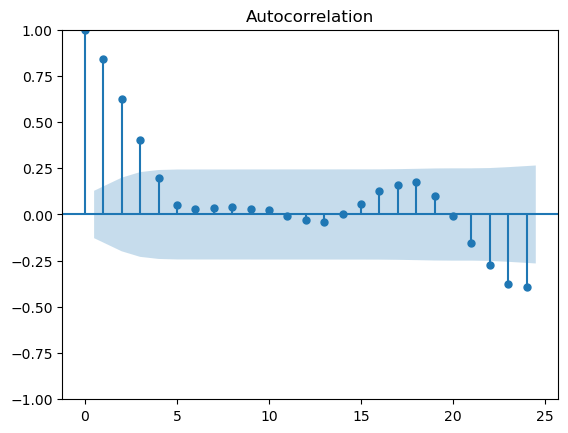

In [54]:
plot_acf(df_conf2)

In [55]:
#df_conf3=df_conf2.diff(periods=5)

In [56]:
#df_conf3=df_conf3.iloc[5:,:]
#df_conf3

In [57]:
#Adfuller test
from statsmodels.tsa.stattools import adfuller
test=adfuller(df_conf2.confirmed) #,autolag="AIC")
print(test)
print("adf_score",test[0])
print("p value",test[1])
print("lags",test[2])
print("no_of_obsrvation",test[3])
print("critical region",test[4])

(-2.9592986845593603, 0.038874201337673685, 13, 220, {'1%': -3.4604283689894815, '5%': -2.874768966942149, '10%': -2.57382076446281}, -534.3469416868077)
adf_score -2.9592986845593603
p value 0.038874201337673685
lags 13
no_of_obsrvation 220
critical region {'1%': -3.4604283689894815, '5%': -2.874768966942149, '10%': -2.57382076446281}


In [58]:
#plot_acf(df_conf3)

In [59]:
df_conf2.shape

(234, 1)

In [60]:
#split data
train=df_conf2[:187]
test=df_conf2[187:]

In [61]:
print(train.shape)
print(test.shape)

(187, 1)
(47, 1)


In [62]:
#Auto Regression model
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
model=ar_select_order(df_conf2,maxlag=16,glob=True)
model.ar_lags

C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


[1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14]

In [63]:
ar_model=AutoReg(train,lags=[1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14])
Ar_model=ar_model.fit()

C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [64]:
predictions=Ar_model.predict(start=test.index[0],end=test.index[-1])

In [65]:
#predict=np.exp(predictions)
#test_set=np.exp(test)

In [66]:
predictions.head()

2020-08-06   -0.019036
2020-08-07   -0.012850
2020-08-08   -0.005759
2020-08-09    0.000882
2020-08-10    0.008137
Freq: D, dtype: float64

In [67]:
test.head()

,confirmed
Date,
2020-08-06,-0.018801
2020-08-07,-0.012213
2020-08-08,-0.004137
2020-08-09,-0.003806
2020-08-10,-0.001235


Text(0.5, 1.0, 'AR model predictions')

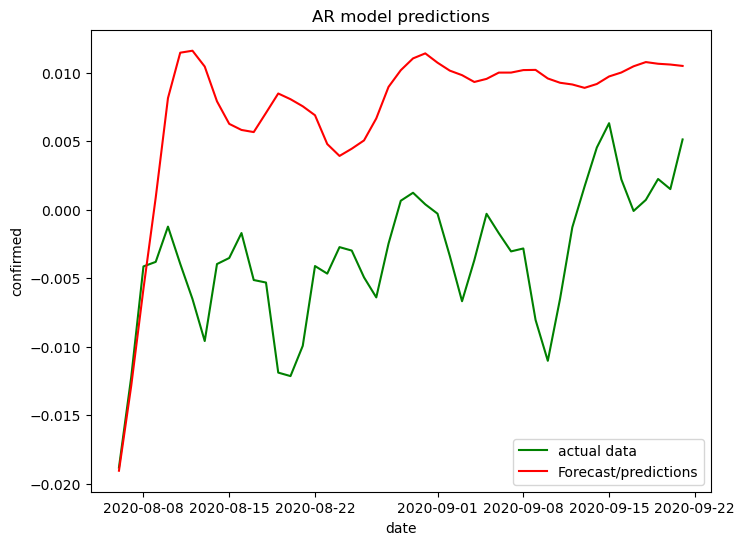

In [68]:
#predictions in graph
plt.figure(figsize=(8,6))
plt.plot(test,label="actual data",color="green")
plt.plot(predictions,label="Forecast/predictions",color="red")
plt.xlabel("date")
plt.ylabel("confirmed")
plt.legend()
plt.title("AR model predictions")

Text(0.5, 1.0, 'AR model predictions')

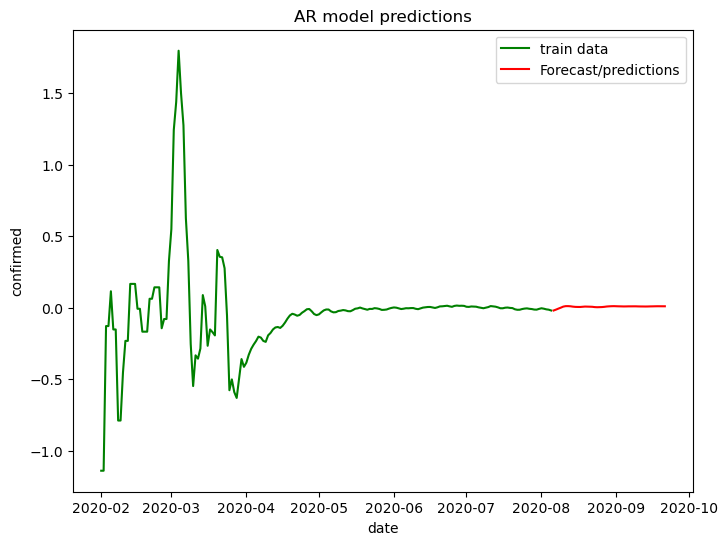

In [69]:
plt.figure(figsize=(8,6))
plt.plot(train,label="train data",color="green")
plt.plot(predictions,label="Forecast/predictions",color="red")
plt.xlabel("date")
plt.ylabel("confirmed")
plt.legend()
plt.title("AR model predictions")

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
mse=mean_squared_error(test,predictions)
mse

0.0001437695268068729

In [71]:
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(train,order=(3,1,2))#p,d,q
Arima_model=arima_model.fit()

C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ansrv\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
predictions=Arima_model.forecast(steps=47)

In [73]:
#predict=np.exp(predictions)
#test_set=np.exp(test)

Text(0.5, 1.0, 'ARIMA model prediction')

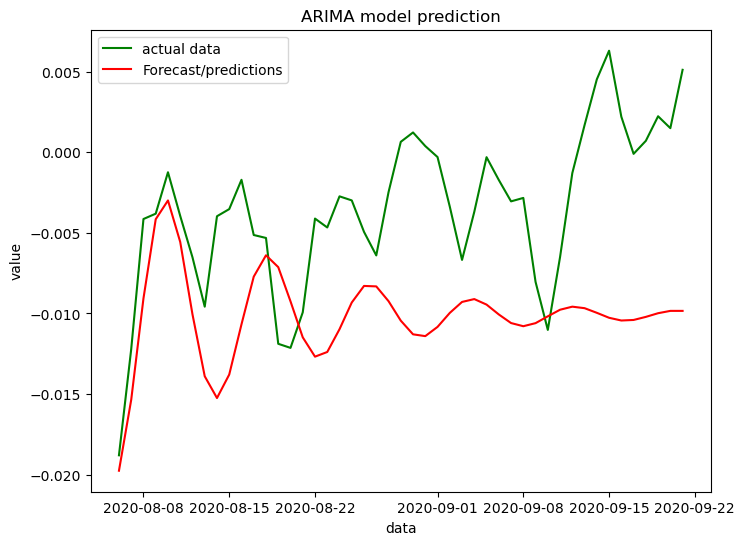

In [74]:
plt.figure(figsize=(8,6))
plt.plot(test,label="actual data",color="green")
plt.plot(predictions,label="Forecast/predictions",color="red")
plt.xlabel("data")
plt.ylabel("value")
plt.legend()
plt.title("ARIMA model prediction")

In [75]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
list1=[]
list2=[]
for params in pdq:
  try:
    model=ARIMA(train,order=params)
    model_arima=model.fit()
    print(params,model_arima.aic)
    list1.append(params)
    list2.append(model_arima.aic)
  except:
    continue

(0, 0, 0) 117.53223742486824
(0, 0, 1) -19.381659676824654
(0, 0, 2) -129.87648063132318
(0, 0, 3) -153.98619740121117
(0, 0, 4) -266.1065571085096
(0, 1, 0) -138.154092598676
(0, 1, 1) -142.2333747467282
(0, 1, 2) -180.64370670560746
(0, 1, 3) -213.64715511294827
(0, 1, 4) -221.20539308268025
(0, 2, 0) -54.183738963615355
(0, 2, 1) -129.42132255271517
(0, 2, 2) -154.13867492743265
(0, 2, 3) -172.56821024593285
(0, 2, 4) -205.01883571102212
(0, 3, 0) 144.39254966469178
(0, 3, 1) -45.55790051938125
(0, 3, 2) -113.21300512799985
(0, 3, 3) -145.6028353625238
(0, 3, 4) -143.73612754522262
(0, 4, 0) 358.6492220195384
(0, 4, 1) 151.89284458010096
(0, 4, 2) -31.80083670861272
(0, 4, 3) -41.04406933752925
(0, 4, 4) -129.6728522144715
(1, 0, 0) -141.94834940156193
(1, 0, 1) -149.79896978471402
(1, 0, 2) -187.74268566585135
(1, 0, 3) -230.91128464802026
(1, 0, 4) -272.99611651122694
(1, 1, 0) -145.34918818060345
(1, 1, 1) -146.17897135700272
(1, 1, 2) -146.83720111072006
(1, 1, 3) -215.829390637

In [91]:
list1,list2

([(0, 0, 0),
  (0, 0, 1),
  (0, 0, 2),
  (0, 0, 3),
  (0, 0, 4),
  (0, 1, 0),
  (0, 1, 1),
  (0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 0),
  (0, 2, 1),
  (0, 2, 2),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 0),
  (0, 3, 1),
  (0, 3, 2),
  (0, 3, 3),
  (0, 3, 4),
  (0, 4, 0),
  (0, 4, 1),
  (0, 4, 2),
  (0, 4, 3),
  (0, 4, 4),
  (1, 0, 0),
  (1, 0, 1),
  (1, 0, 2),
  (1, 0, 3),
  (1, 0, 4),
  (1, 1, 0),
  (1, 1, 1),
  (1, 1, 2),
  (1, 1, 3),
  (1, 1, 4),
  (1, 2, 0),
  (1, 2, 1),
  (1, 2, 2),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3, 0),
  (1, 3, 1),
  (1, 3, 2),
  (1, 3, 3),
  (1, 3, 4),
  (1, 4, 0),
  (1, 4, 1),
  (1, 4, 2),
  (1, 4, 3),
  (1, 4, 4),
  (2, 0, 0),
  (2, 0, 1),
  (2, 0, 2),
  (2, 0, 3),
  (2, 0, 4),
  (2, 1, 0),
  (2, 1, 1),
  (2, 1, 2),
  (2, 1, 3),
  (2, 1, 4),
  (2, 2, 0),
  (2, 2, 1),
  (2, 2, 2),
  (2, 2, 3),
  (2, 2, 4),
  (2, 3, 0),
  (2, 3, 1),
  (2, 3, 2),
  (2, 3, 3),
  (2, 3, 4),
  (2, 4, 0),
  (2, 4, 1),
  (2, 4, 2),
  (2, 4, 3),
  (2, 4, 4),
  (3, 0, 0),
  (3, 0, 1),

In [79]:
min(list2)

-291.5878909106086

In [80]:
list2.index(min(list2))

104

In [81]:
list1[104]

(4, 0, 4)

In [82]:
model_arima=ARIMA(train,order=(4,0,4))
Model_Arima=model_arima.fit()

In [83]:
predictions=Model_Arima.forecast(steps=47)

In [84]:
#predict=np.exp(predictions)
#test_set=np.exp(test)

Text(0.5, 1.0, 'Arima model predictions')

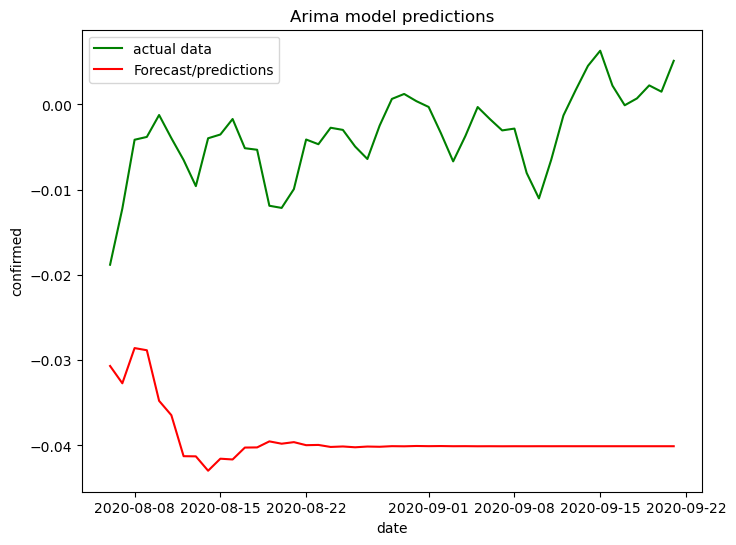

In [85]:
plt.figure(figsize=(8,6))
plt.plot(test,label="actual data",color="green")
plt.plot(predictions,label="Forecast/predictions",color="red")
plt.xlabel("date")
plt.ylabel("confirmed")
plt.legend()
plt.title("Arima model predictions")

Text(0.5, 1.0, 'Arima model predictions')

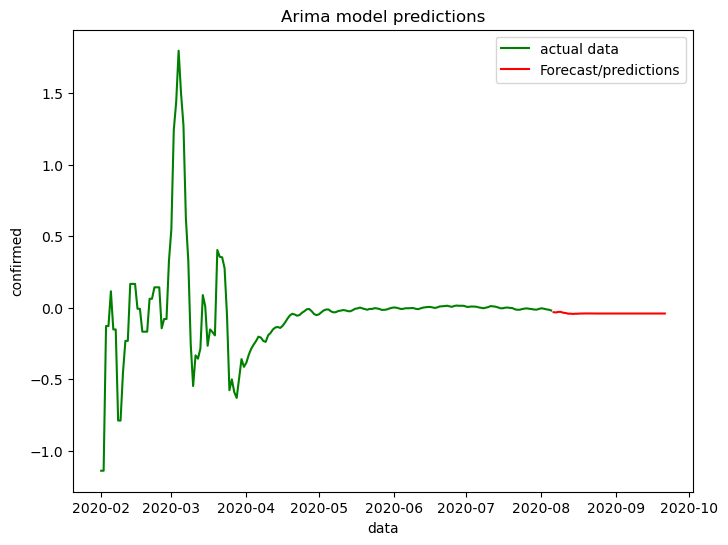

In [86]:
plt.figure(figsize=(8,6))
plt.plot(train,label="actual data",color="green")
plt.plot(predictions,label="Forecast/predictions",color="red")
plt.xlabel("data")
plt.ylabel("confirmed")
plt.legend()
plt.title("Arima model predictions")

Text(0.5, 1.0, 'Actual data ')

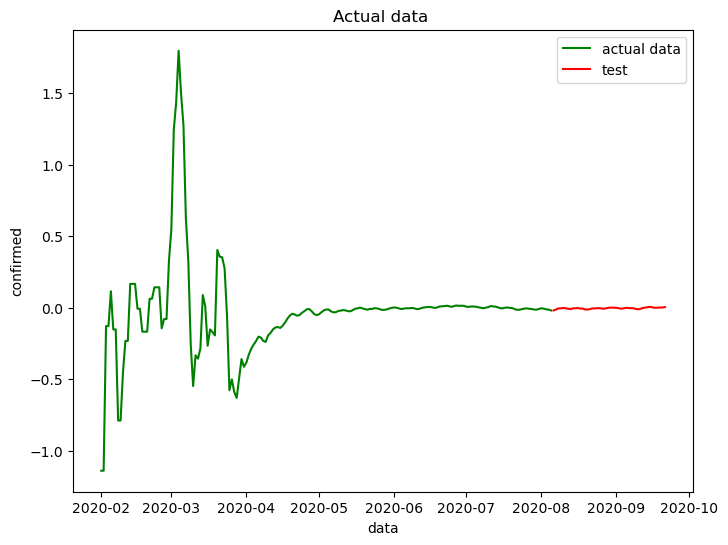

In [92]:
plt.figure(figsize=(8,6))
plt.plot(train,label="actual data",color="green")
plt.plot(test,label="test",color="red")
plt.xlabel("data")
plt.ylabel("confirmed")
plt.legend()
plt.title("Actual data ")

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [88]:
mse=mean_squared_error(test,predictions)
mse

0.001318009679870756

In [89]:
mae=mean_absolute_error(test,predictions)
mae

0.03572035995136658

In [90]:
rmse=np.sqrt(mse)
rmse


0.036304403036969995

In [93]:
mape=mean_absolute_percentage_error(test,predictions)
mape

29.487938158377442

### Model comparison report

Both AR and ARIMA model can forcast/predict the US data.Because,When we compare the AR and ARIMA ,AR mse is0.00014 and ARIMA got the MSE value of 0.0012 and RMSE value 0.035 , it seems that Both model are average in forecasting.


### Conclusion And Suggestion

US is the most populated country other than China and India.Eventhough confirmed,recovered and death value is more when compared China and India.
Based on the prediction we can say that confirmed case decreases gradually and showing constant.To overcome the situations people should take more precautions.
* wear mask properly
* Keep social distances 
* Avoid body contacts
* Avoid unnecessry outing
* sterilize hands
* Consume vitamin D and omega 3 rich foods
* Drink plenty of water